In [2]:
import pandas as pd
import numpy as np
from PIL import Image  
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import matplotlib.image as mpimg
from tqdm import tqdm
import seaborn as sns


##  Load Data


In [3]:
listings = pd.read_csv("data/listings.csv")
reviews = pd.read_csv("data/reviews.csv")
reviews_meta = pd.read_csv("data/reviews.csv.gz")
calendar = pd.read_csv("data/calendar.csv.gz")

display(listings.head())
display(reviews.head())
display(reviews_meta.head())
display(calendar.head())


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,218831,Sea-life apartment,137588,Dimitrios,NaN,Kalamaria,40.57274,22.95667,Entire home/apt,90.0,4,1,2020-02-02,0.02,1,358,0,00000049330
1,376955,3 bedroom 145m2 apartment close to the seaside,1894819,Olivia,NaN,Thessaloniki,40.59683,22.95394,Entire home/apt,50.0,28,19,2017-05-31,0.12,1,363,0,NaN
2,483128,Stel's apt in Thessaloniki center!,2358521,Stelios,NaN,Thessaloniki,40.63942,22.95121,Entire home/apt,38.0,2,402,2024-12-15,2.63,1,356,26,00000502736
3,494816,"City View Apartment ""Thessaloniki""",1977386,Cristina&Tomas! Skgbnb,NaN,Neapolis – Sykeon,40.64763,22.94309,Entire home/apt,NaN,20,46,2024-02-03,0.32,33,208,2,00001900000
4,550239,Kripis Studio Thessaloniki No1,1193625,Olga,NaN,Thessaloniki,40.64008,22.95598,Entire home/apt,66.0,7,8,2023-10-17,0.05,6,248,0,1133335


,listing_id,date
0,218831,2020-02-02
1,376955,2012-06-11
2,376955,2012-08-18
3,376955,2012-08-22
4,376955,2012-08-29


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,218831,600606086,2020-02-02,55444796,Άρης,Όμορφος χώρος με πολλά θαλασσινά souvenirs
1,376955,1463632,2012-06-11,2226744,Arsim,It was a short stay at Olivia's place but I ca...
2,376955,2019841,2012-08-18,2881187,Mate,"Beatiful, clean apartment, and great, great ow..."
3,376955,2069657,2012-08-22,3151061,Ruslan,We enjoyed all the time of staying in this pla...
4,376955,2134355,2012-08-29,2553138,Dilyana,This apartment is very large and as beautiful ...


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,218831,2024-12-25,f,$90.00,NaN,4,90
1,218831,2024-12-26,f,$90.00,NaN,4,90
2,218831,2024-12-27,f,$90.00,NaN,4,90
3,218831,2024-12-28,f,$90.00,NaN,4,90
4,218831,2024-12-29,f,$90.00,NaN,4,90


# 2. Data Exploration

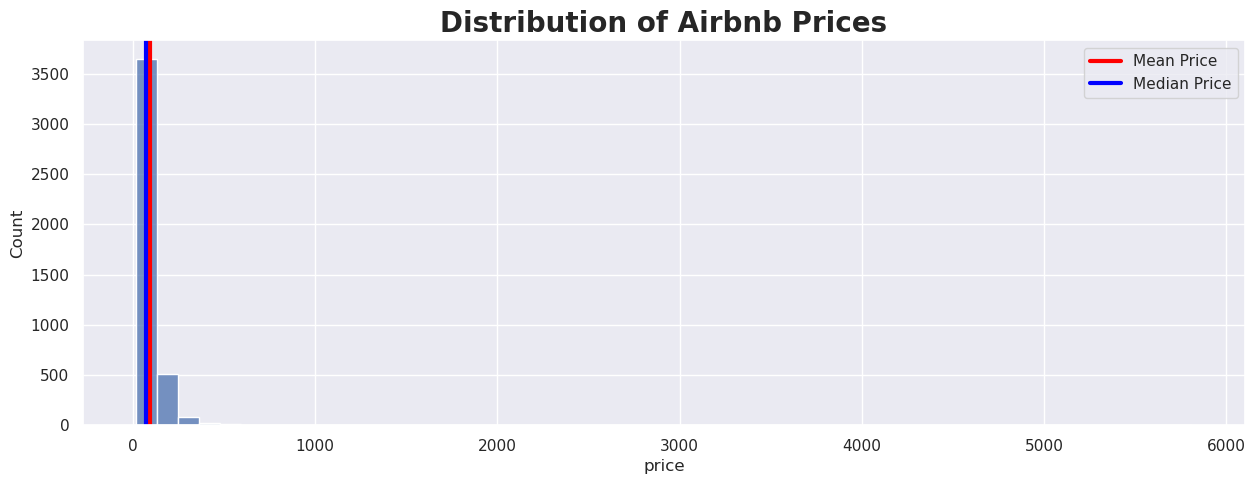

In [4]:
sns.set(rc={"figure.figsize": (15, 5)})
fig = plt.figure()
sns.histplot(data=listings, x="price", bins=50)
plt.axvline(listings["price"].mean(), c="red", ls="-", lw=3, label="Mean Price")
plt.axvline(listings["price"].median(), c="blue", ls="-", lw=3, label="Median Price")
plt.title("Distribution of Airbnb Prices", fontsize=20, fontweight="bold")
plt.legend()
plt.show()

In [5]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Plot')

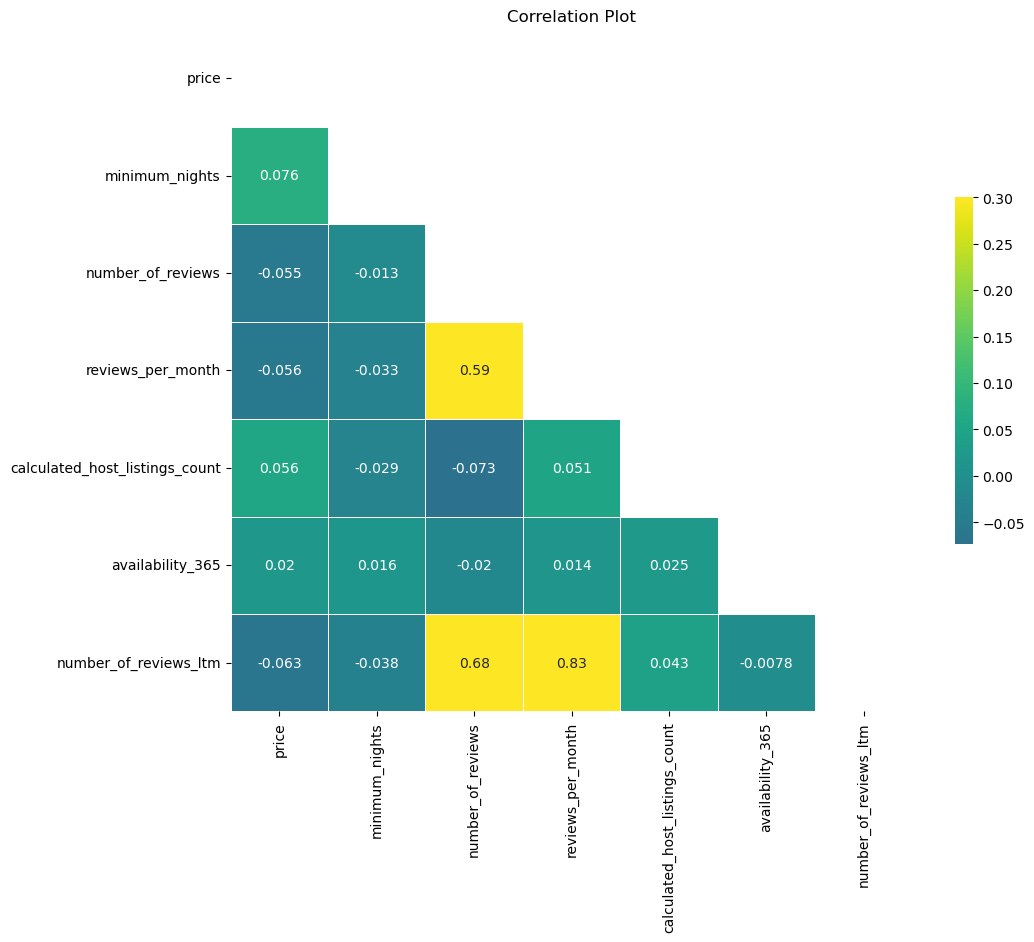

In [18]:
# plot correlation plot to understand which feature could be influence the price
col = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
         'availability_365', 'number_of_reviews_ltm']

# com,pute correlation
corr = listings[col].corr()   

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="viridis", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Plot")


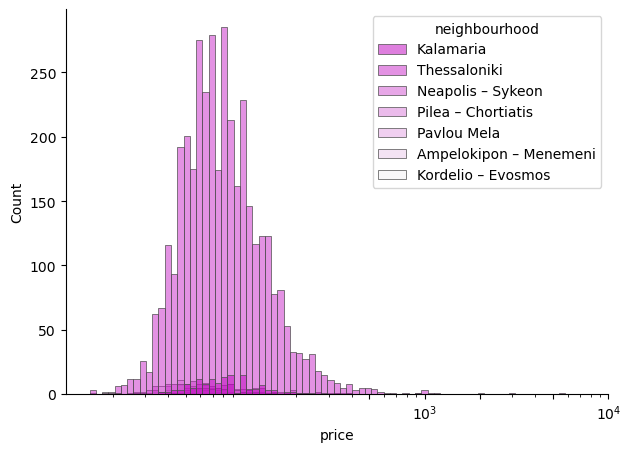

In [9]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    listings,
    x="price", hue="neighbourhood",
    multiple="layer",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.set_xticks([500, 1000, 2000, 5000, 10000])

<Axes: xlabel='price', ylabel='Count'>

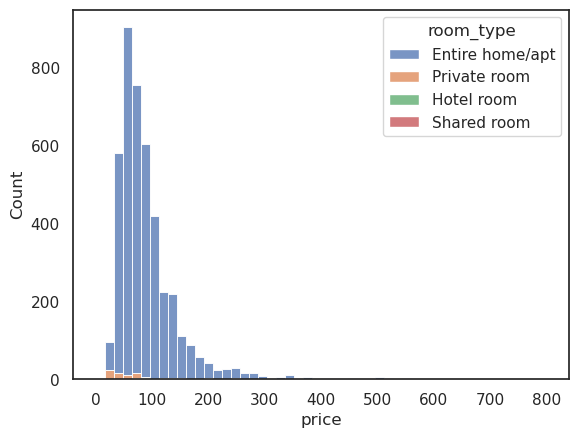

In [46]:
sns.histplot(data=listings, x="price", hue="room_type", multiple="stack", binrange= (0,800), bins=50)

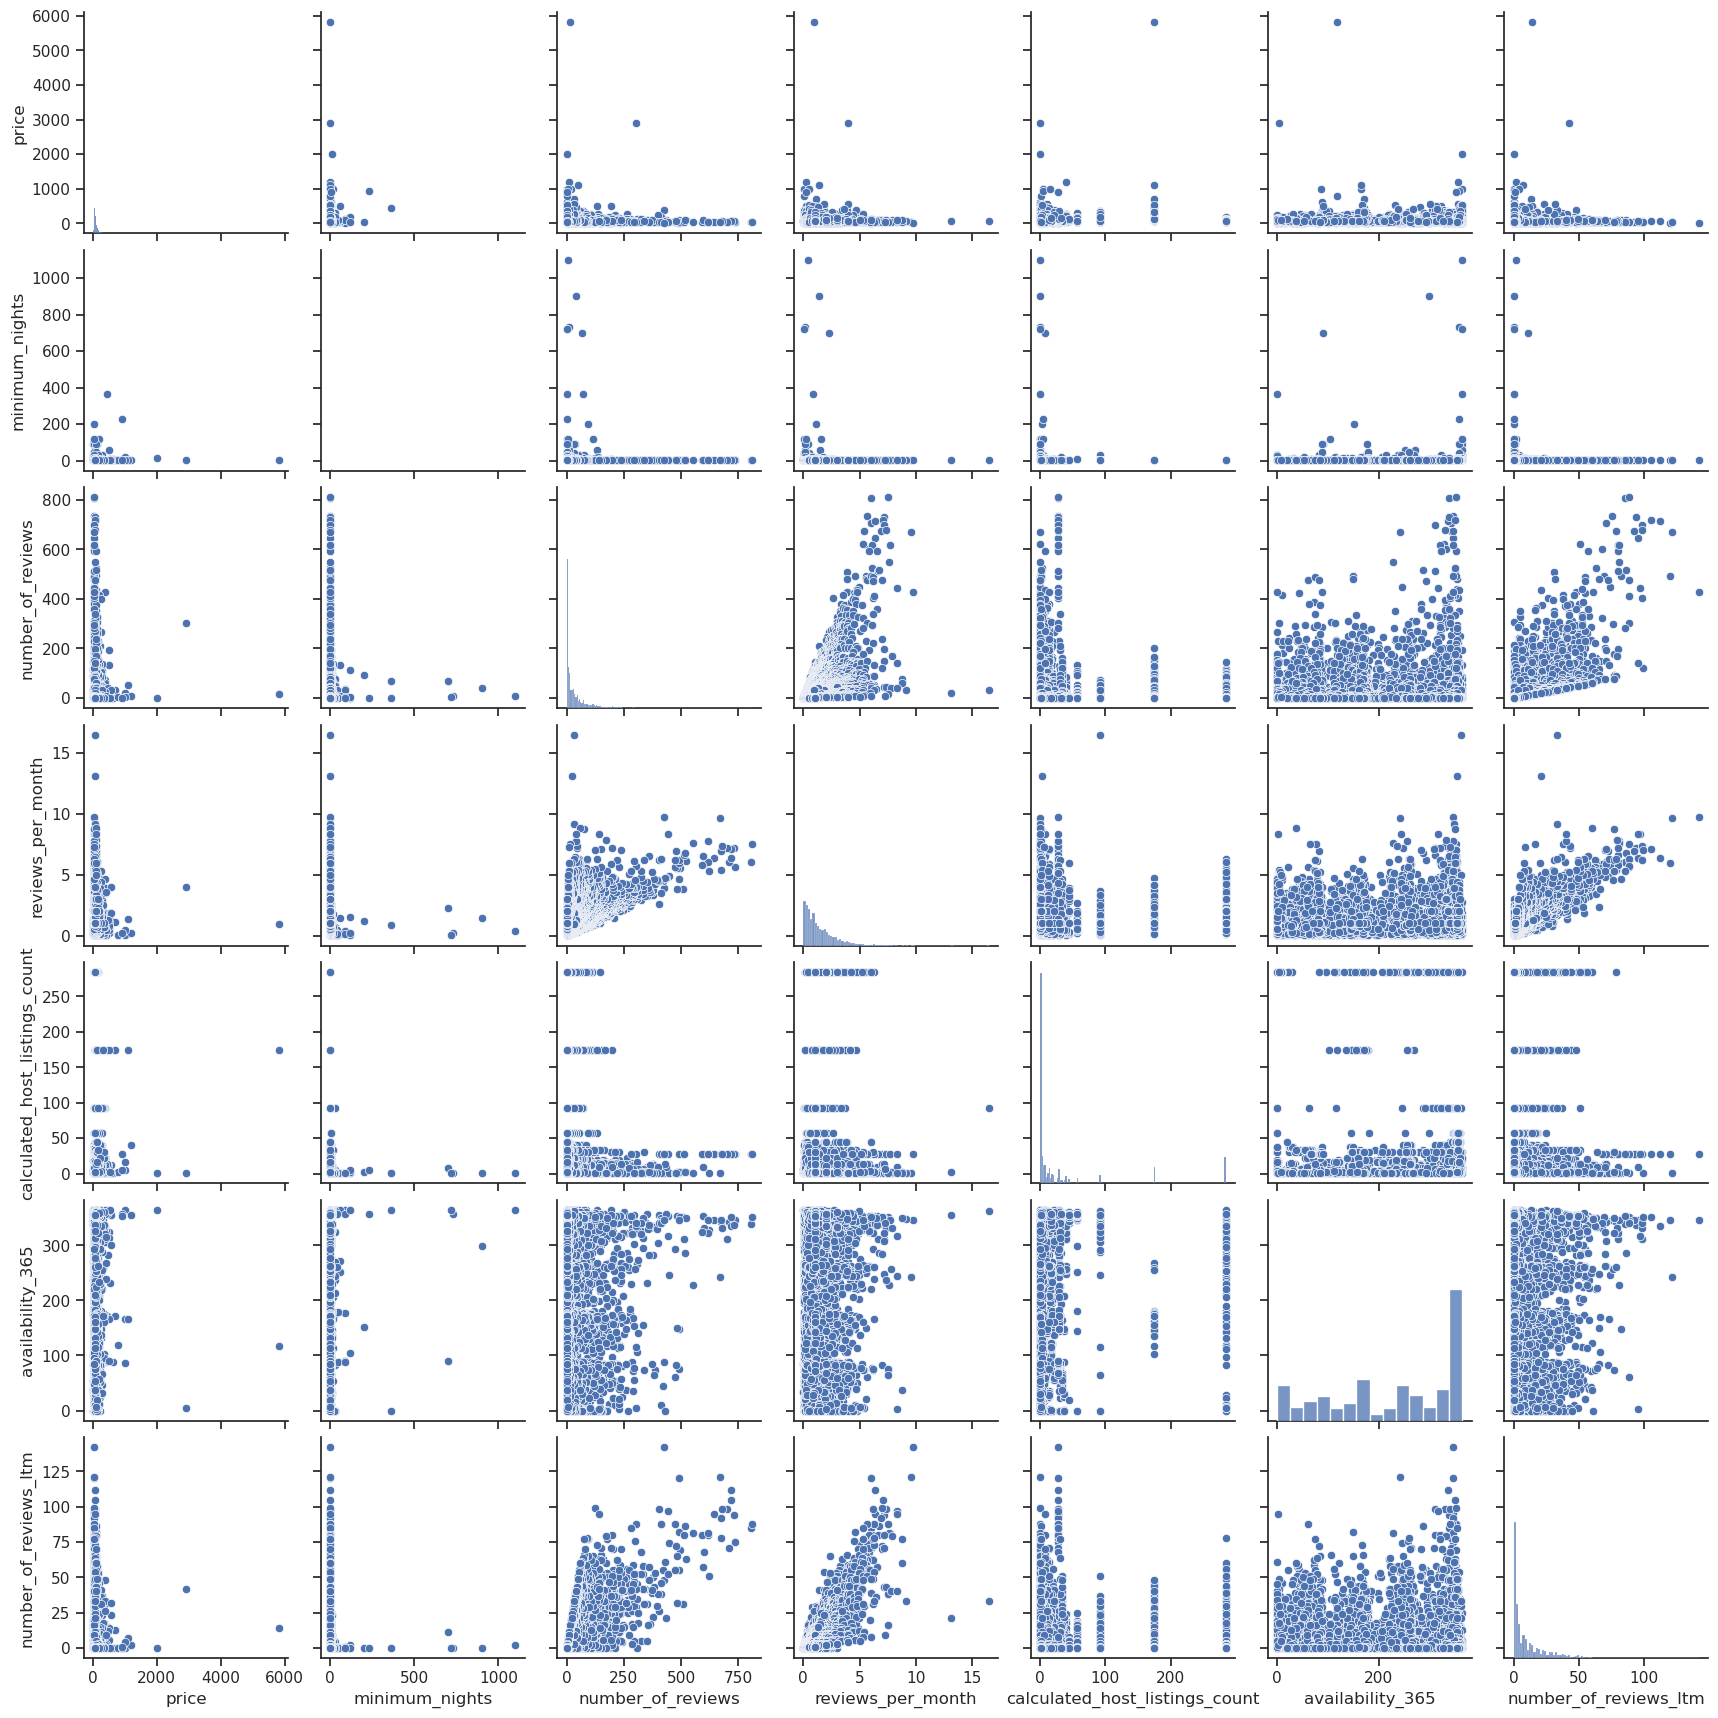

In [10]:
sns.set_theme(style="ticks")

sns.pairplot(listings[col])

In [13]:
# normalized data

col = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
         'availability_365', 'number_of_reviews_ltm']
normalized_df = listings[col]

normalized_df = (normalized_df - normalized_df.mean())/normalized_df.std()

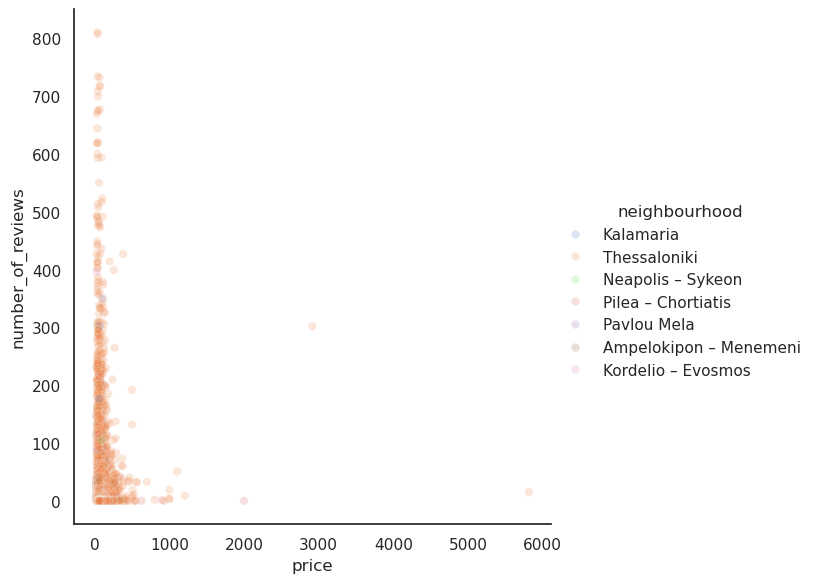

In [34]:
sns.set_theme(style="white")

sns.relplot(x="price", y="number_of_reviews",
            sizes=(40, 400), alpha=.2, palette="muted",hue="neighbourhood",
            height=6, data=listings)

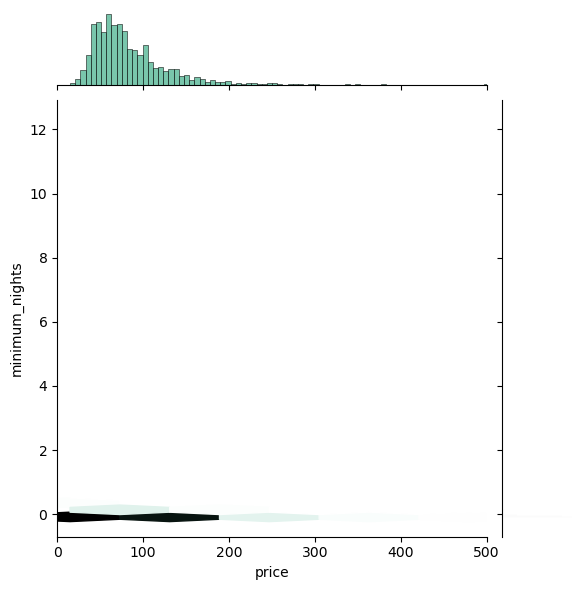

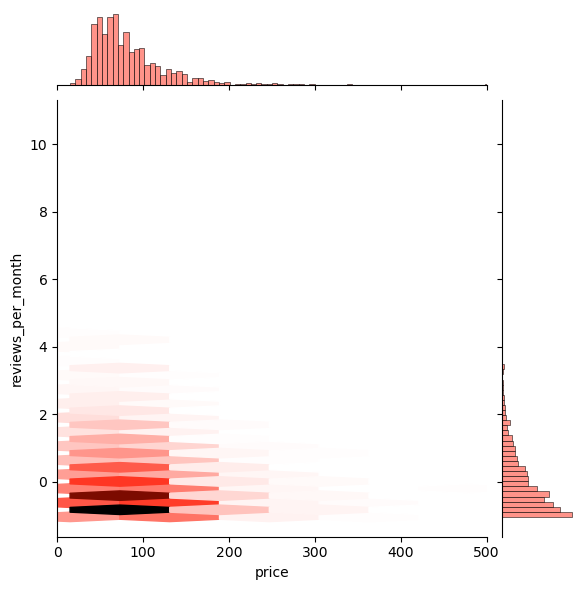

In [21]:
# Plot 1
jp1 = sns.jointplot(
    x=listings['price'],
    y=normalized_df['minimum_nights'],
    kind="hex",
    color="#4CB391",
    xlim=(0, 500)
)

# Plot 2
jp2 = sns.jointplot(
    x=listings['price'],
    y=normalized_df['reviews_per_month'],
    kind="hex",
    color="#FF6F61",
    xlim=(0, 500)
)